In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import time

%matplotlib inline
from mpl_toolkits import mplot3d

In [2]:
def dealing_dist():
    x = np.random.randint(1,14)
    if x <= 9:
        return x
    return 10

In [3]:
def start_deal():
    
    d_1 = dealing_dist()
    d_2 = dealing_dist()
    
    p_1 = dealing_dist()
    p_2 = dealing_dist()
    
    return d_1, d_2, p_1, p_2

In [177]:
def initial_check(d1, d2, p1, p2):
    
    reward = None
    p_normality = d_normality = 0
    p_sum = p1 + p2
    d_sum = d1 + d2
    
    if p1 != 1 and p2 != 1:
        p_usability = 0
    else: 
        if p_sum == 11:
            p_sum += 10
            p_normality = 1
            p_usability = 1
        else:
            p_sum += 10
            p_usability = 1
            
    if d1 != 1 and d2 != 1:
        d_usability = 0
    else: 
        if d_sum == 11:
            d_normality = 1
            d_usability = 1
        else:
            d_sum += 10
            d_usability = 1
            
    p_state = (d2, p_sum, p_usability)  
    d_state = (d_sum, d_usability)
    
    if p_normality:
        if d_normality:
            reward = 0
        else:
            reward = 1
            
    return reward, p_state, d_state

In [134]:
def playerhits(sequence):
    
    a, b, c = sequence[-1]      
    
    if b > 19:
        return sequence
    
    new_card = dealing_dist()
    
    if b < 12:
        if new_card == 1 and b + new_card < 12:
            b += 11
            c = 1
            
        elif new_card == 1:
            b += 1
            
        else:
            b += new_card
            
        return playerhits([(a, b, c)])
               
    b += new_card
    
        
    if c: 
        if b > 21:
            c = 0
            b -= 10
        return playerhits(sequence + [(a, b, c)])
        
    elif b > 19:
        return sequence + [(a, b, c)]
    else:
        return playerhits(sequence + [(a, b, c)])   

In [95]:
def dealerhits(state, p_sum):
    
    d_sum = state[0]
    d_usability = state[1]
    
    if d_sum > 21:
        return 1
    
    if d_sum > 16:
        if d_sum > p_sum:
            return -1
        elif d_sum < p_sum:
            return 1
        else:
            return 0
    
    
    new_card =  dealing_dist()
    d_sum += new_card
    
    if d_usability and d_sum > 21:
        
        d_usability = 0
        d_sum -= 10
        return dealerhits((d_sum, d_usability), p_sum)
        
    
    if new_card == 1 and not d_sum + 10 < 22:
        d_sum += 10
        d_usability = 1
        return dealerhits((d_sum, d_usability), p_sum)  
    
    return dealerhits((d_sum, d_usability), p_sum) 

In [192]:
class Blackjack:
    def __init__(self, n_episodes = 5000):
        
        self.V = np.zeros((10,10,2))
        
        for i in range(n_episodes):
            
            self.V_flag = np.zeros((10,10,2)).astype(int)
            self.sequence = []
            d1, d2, p1, p2 = start_deal()
            
            reward, p_state, q_state = initial_check(d1, d2, p1, p2)
            self.temp = p_state
            
            
            
            if reward is not None:
                self.updatevalue([p_state], reward)
            else:
                sequence = playerhits([p_state])
                self.tempseq = sequence
                if sequence[-1][1] > 21:
                    sequence.pop()
                    reward = 0
                else:
                    reward = dealerhits(q_state, sequence.pop()[1])

                    
                self.updatevalue(sequence, reward)  
                
    def updatevalue(self, sequence, reward):
        
        while len(sequence) > 0:
            
            a,b,c = sequence.pop()
            
            a -= 1 
            b -= 12
            if self.V_flag[(a,b,c)] == 0:
                self.V_flag[(a,b,c)] = 1
                self.V[(a,b,c)] += reward     

In [208]:
n = 500000
model = Blackjack(n)

In [209]:
print(model.V[:,:,0]/n)

[[0.001624 0.001522 0.001422 0.001446 0.001368 0.00131  0.001188 0.001228
  0.       0.      ]
 [0.001796 0.001782 0.001578 0.001696 0.001474 0.001514 0.001464 0.001258
  0.       0.      ]
 [0.00188  0.00176  0.00182  0.00161  0.001582 0.001554 0.001352 0.001422
  0.       0.      ]
 [0.001852 0.001662 0.00172  0.001644 0.001576 0.001594 0.00145  0.001396
  0.       0.      ]
 [0.00183  0.001798 0.001676 0.001752 0.001514 0.0016   0.001436 0.001314
  0.       0.      ]
 [0.001972 0.001814 0.001764 0.001704 0.001668 0.00155  0.001424 0.001458
  0.       0.      ]
 [0.002102 0.001876 0.00194  0.001926 0.001702 0.001496 0.001578 0.001422
  0.       0.      ]
 [0.00203  0.001892 0.002044 0.001884 0.001678 0.00166  0.00147  0.00152
  0.       0.      ]
 [0.001926 0.001882 0.001778 0.001796 0.001714 0.00164  0.00145  0.001478
  0.       0.      ]
 [0.00692  0.006646 0.006364 0.006164 0.005852 0.00557  0.005264 0.005132
  0.       0.      ]]


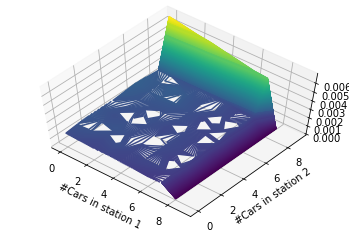

In [212]:
X = Y = np.arange(10).astype(int)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, model.V[:,:,0]/n, 1000, cmap='viridis')
ax.set_xlabel('#Cars in station 1')
ax.set_ylabel('#Cars in station 2')
ax.set_zlabel('Value');
ax.view_init(60, -50)